# AutoEncoder In DeepLearning With CNN  

In [573]:
import torch, torch.nn as nn
import torch.optim as optim 
from torch.utils.data import DataLoader, random_split, Subset

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

## Load MNSIT Dataset

In [118]:
mnist = datasets.MNIST('../files/', download=False, 
                      transform= transforms.Compose([
                          transforms.ToTensor(),
                          nn.Flatten()
                      ])
        )

In [119]:
# define function to plot handwrite digits images 

def imshow_image(tensor: torch.Tensor) -> None:
    plt.imshow(tensor.detach().view(28, 28).numpy())

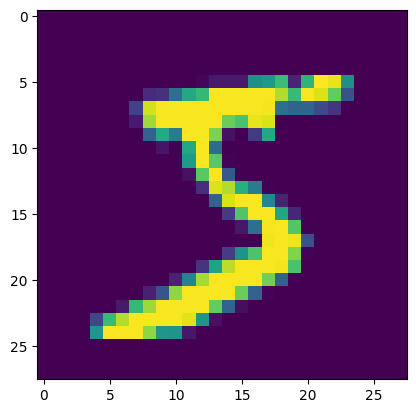

In [120]:
imshow_image(mnist[0][0])

## Split Dataset

In [224]:
train_data, test_data = random_split(mnist, [50000, 10000])

In [329]:
batch_size = 32


train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10000, shuffle=True)

## Build The AutoEncoder Model

### Define The Encoder Model

In [514]:
class Encoder(nn.Module):

    def __init__(self, input_size: int = 28*28, embeddings_size = 10) -> None:
        super(Encoder, self).__init__()

        self.conv_encoder = nn.Sequential(
            nn.Conv2d(1, 10, 3),
            nn.Conv2d(10, 8, 3),
            nn.ReLU(),
            nn.Conv2d(8, 4, 7),
            nn.Flatten(1, -1),
        )

        self.linear_encoder = nn.Sequential(
            nn.Linear(4 * 18 * 18, 128),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, embeddings_size)
        )

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        out = input.view(-1, 1, 28, 28)
        out = self.conv_encoder(out)
        return self.linear_encoder(out)

In [515]:
encoder = Encoder()

In [516]:
input, _ = next(iter(train_loader))

In [517]:
mnist[0][0].shape

torch.Size([1, 784])

In [518]:
input.view(-1,1, 28, 28).shape

torch.Size([32, 1, 28, 28])

In [519]:
encoder(input).shape

torch.Size([32, 10])

### Define The Decoder Model

In [520]:
class Decoder(nn.Module):
    def __init__(self, input_size: int = 10, embeddings_size=10):
        super(Decoder, self).__init__()
        
        self.linear_decoder = nn.Sequential(
            nn.Linear(embeddings_size, 32),
            nn.ReLU(),
            nn.Linear(32, 128),
            nn.ReLU(),
            nn.Linear(128, 4 * 18 * 18),
            nn.Unflatten(1, (4, 18, 18))
        )

        self.conv_decoder = nn.Sequential(
            nn.ConvTranspose2d(4, 8, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 10, 3),
            nn.ReLU(),
            nn.ConvTranspose2d(10, 1, 3),
        )

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        out = self.linear_decoder(input)
        return self.conv_decoder(out.view(-1, 4, 18, 18))


In [521]:
decoder = Decoder()

In [522]:
img = decoder(torch.randn(1, 10))

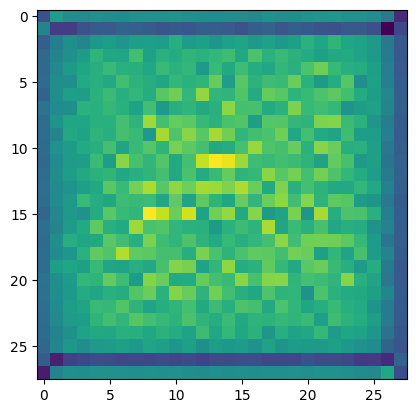

In [523]:
imshow_image(img)

## Build The AutoEncoder Model:

In [533]:
class AutoEncoderCNN(nn.Module):

    def __init__(self, input_size=28*28, embeddings_size=100) -> None:
        super(AutoEncoderCNN, self).__init__()

        self.encoder = Encoder(input_size, embeddings_size)
        self.decoder = Decoder(embeddings_size=embeddings_size)

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        out = self.encoder(input)
        return self.decoder(out)

In [534]:
model = AutoEncoderCNN()

In [535]:
model

AutoEncoderCNN(
  (encoder): Encoder(
    (conv_encoder): Sequential(
      (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
      (1): Conv2d(10, 8, kernel_size=(3, 3), stride=(1, 1))
      (2): ReLU()
      (3): Conv2d(8, 4, kernel_size=(7, 7), stride=(1, 1))
      (4): Flatten(start_dim=1, end_dim=-1)
    )
    (linear_encoder): Sequential(
      (0): Linear(in_features=1296, out_features=128, bias=True)
      (1): Linear(in_features=128, out_features=32, bias=True)
      (2): ReLU()
      (3): Linear(in_features=32, out_features=100, bias=True)
    )
  )
  (decoder): Decoder(
    (linear_decoder): Sequential(
      (0): Linear(in_features=100, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=128, bias=True)
      (3): ReLU()
      (4): Linear(in_features=128, out_features=1296, bias=True)
      (5): Unflatten(dim=1, unflattened_size=(4, 18, 18))
    )
    (conv_decoder): Sequential(
      (0): ConvTranspose2d(4, 8, kernel_size=(7, 7)

In [536]:
img = model(mnist[0][0])

In [537]:
img.shape

torch.Size([1, 1, 28, 28])

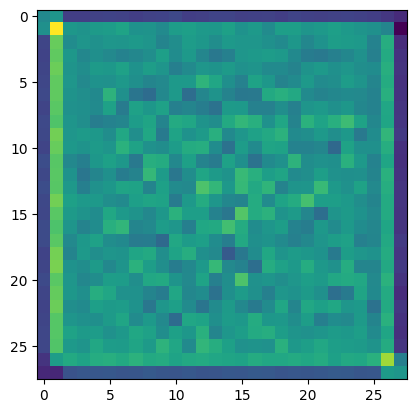

In [538]:
imshow_image(img)

## Train Model 

### Define Loss and Optimizer

In [539]:
criterion = nn.MSELoss()

In [540]:
params_to_optimize = [
    {'params': model.encoder.parameters()},
    {'params': model.decoder.parameters()}
]

In [541]:
opt = optim.Adam(params_to_optimize,lr=0.001)


### Train Loop

Iteration: 0 | loss: 0.007350083906203508


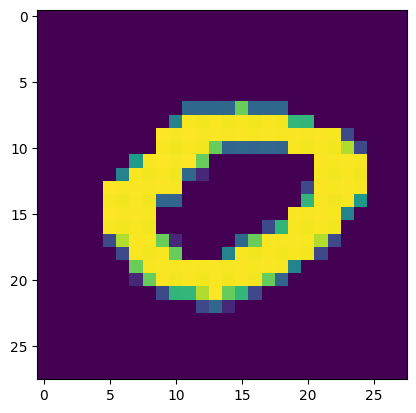

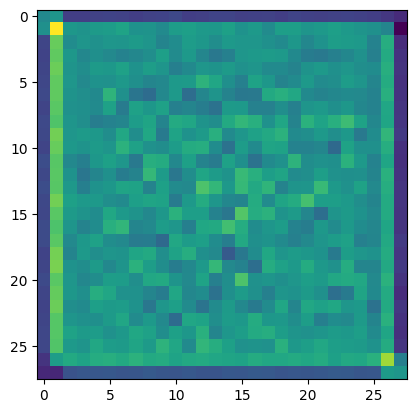

Iteration: 1 | loss: 0.006306980736553669


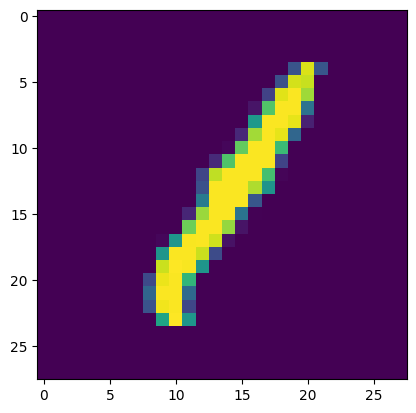

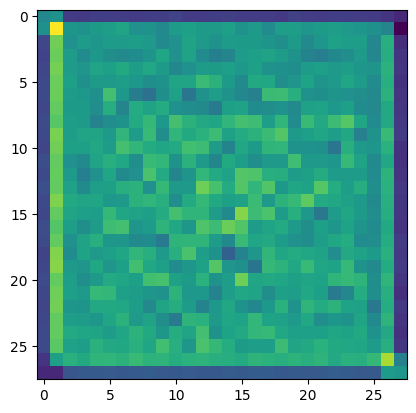

Iteration: 100 | loss: 0.002085978165268898


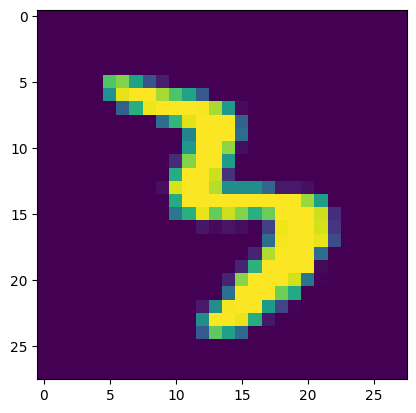

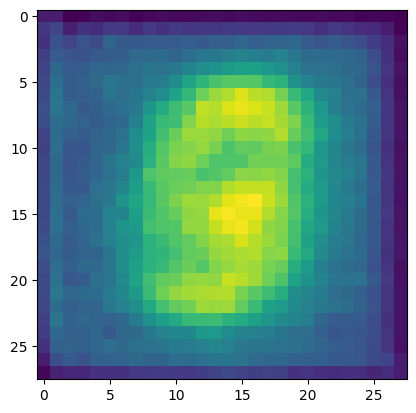

Iteration: 200 | loss: 0.001617761910893023


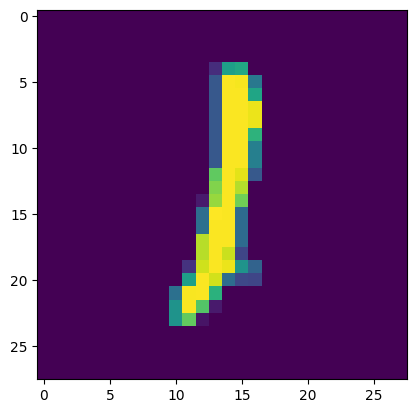

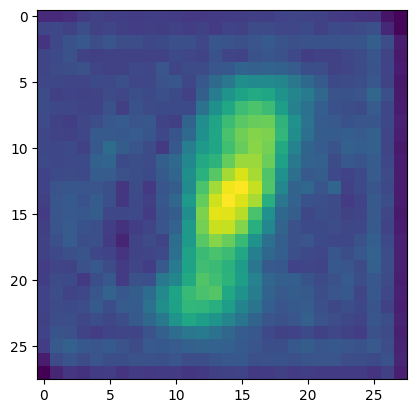

Iteration: 300 | loss: 0.0012065258342772722


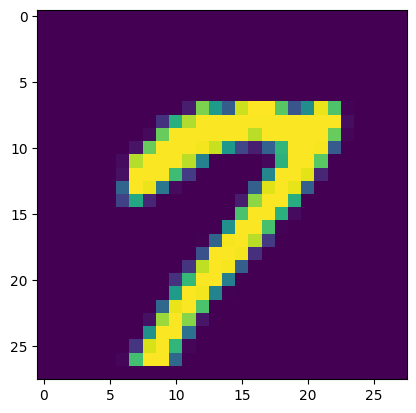

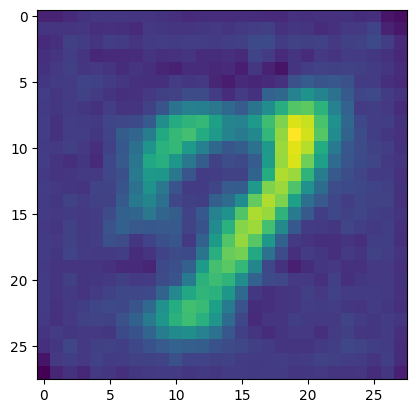

Iteration: 400 | loss: 0.0010352430399507284


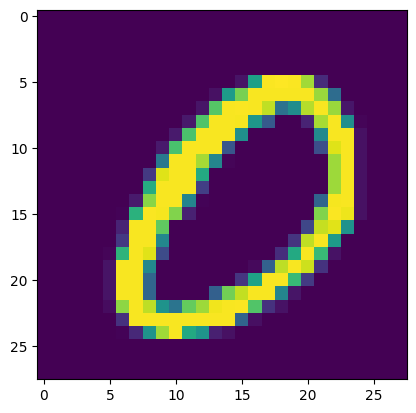

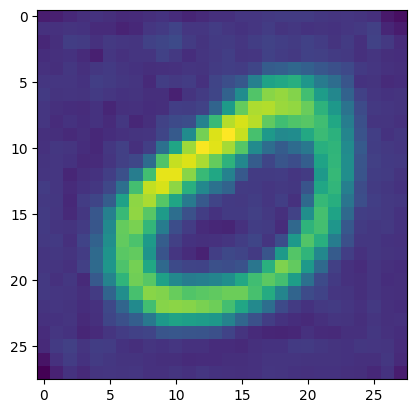

Iteration: 500 | loss: 0.0009808376198634505


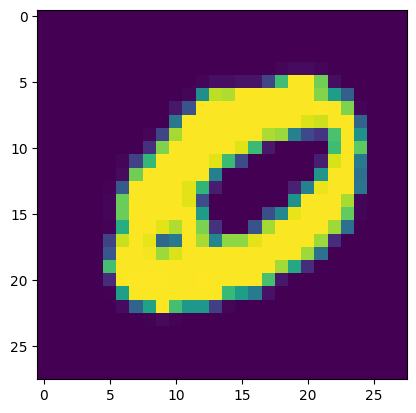

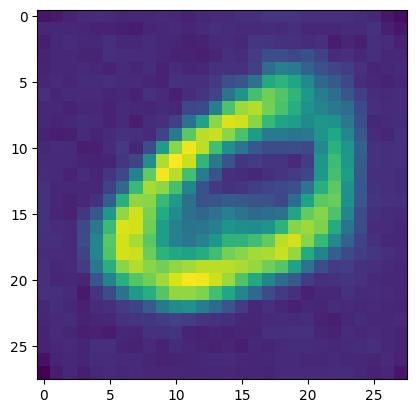

Iteration: 600 | loss: 0.0007399286259897053


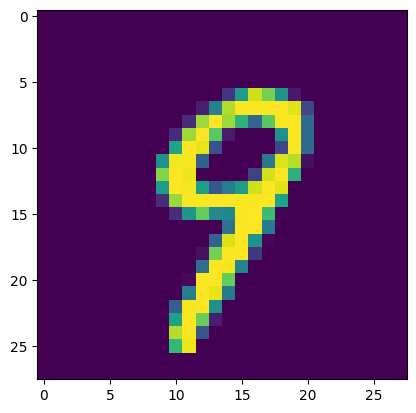

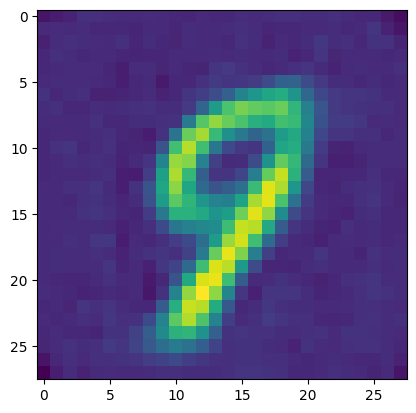

Iteration: 700 | loss: 0.0007998417131602764


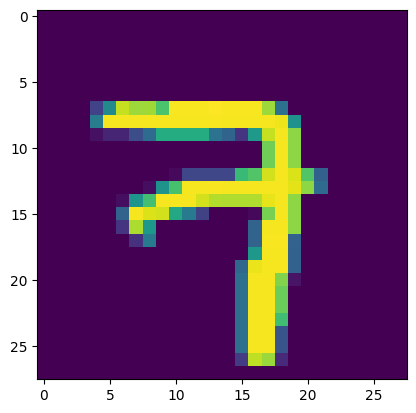

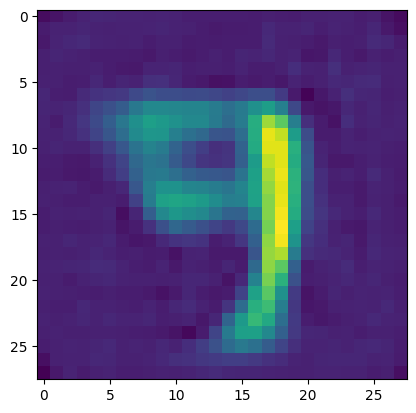

Iteration: 800 | loss: 0.0007596318610012531


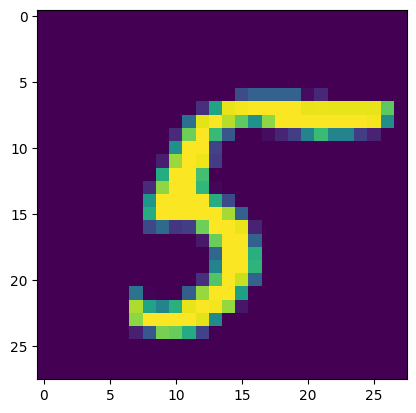

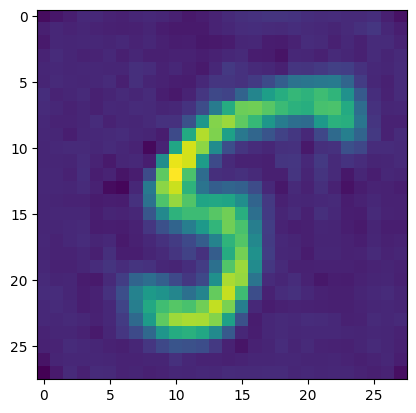

Iteration: 900 | loss: 0.0006503814947791398


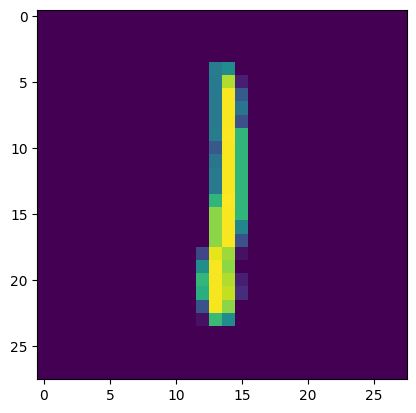

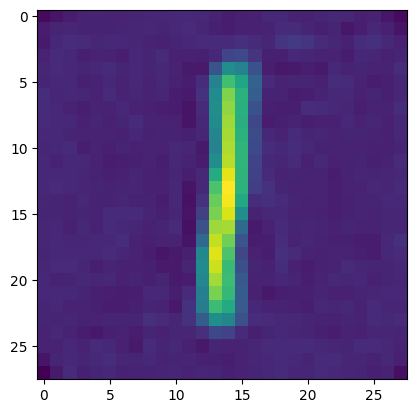

Iteration: 1000 | loss: 0.0007917510811239481


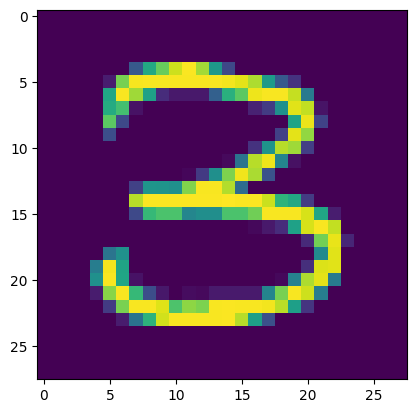

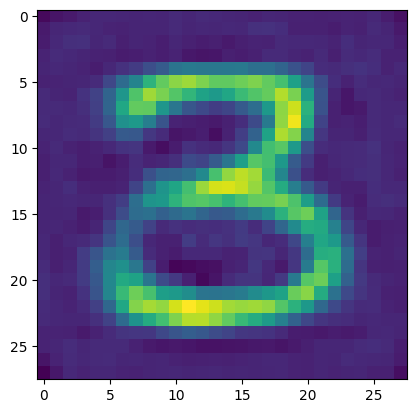

Iteration: 1100 | loss: 0.0006420733407139778


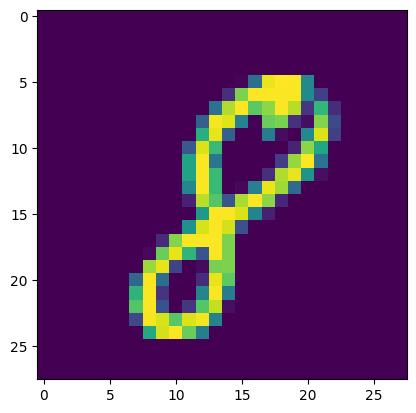

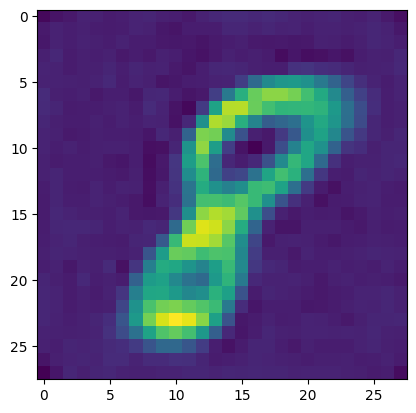

Iteration: 1200 | loss: 0.0006863174494355917


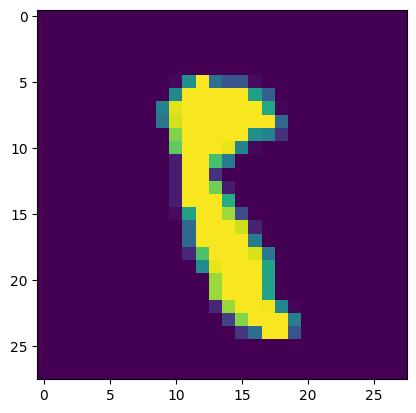

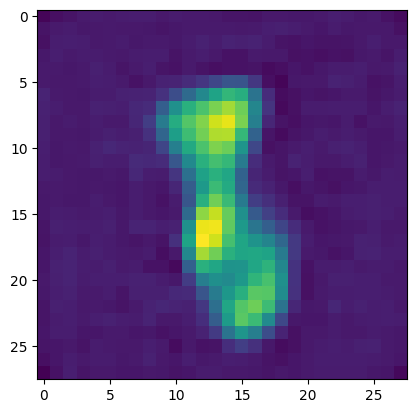

Iteration: 1300 | loss: 0.0006281934911385179


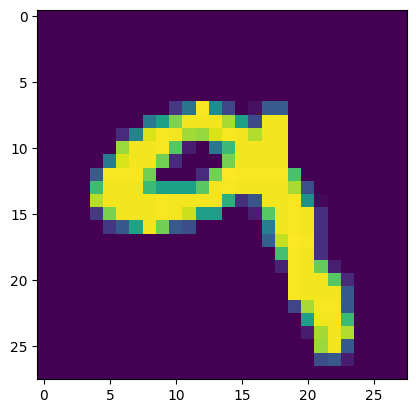

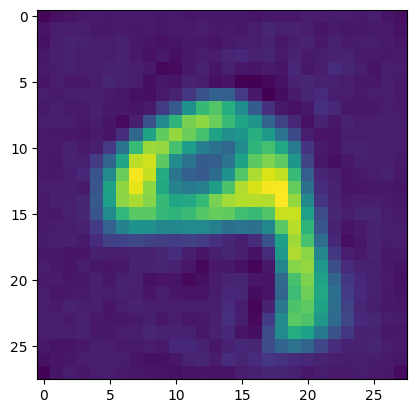

Iteration: 1400 | loss: 0.0005364188691601157


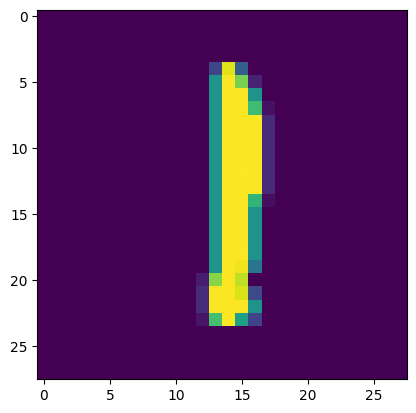

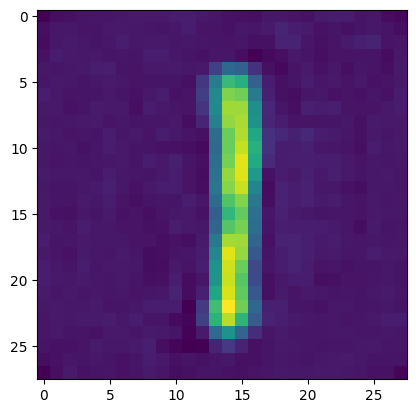

Iteration: 1500 | loss: 0.0004956278135068715


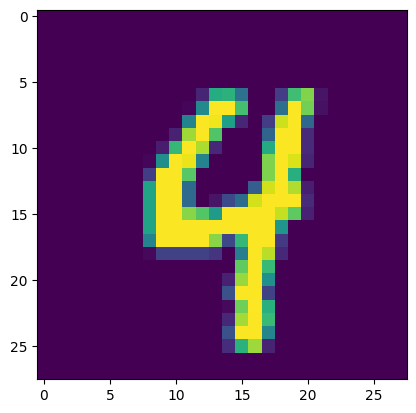

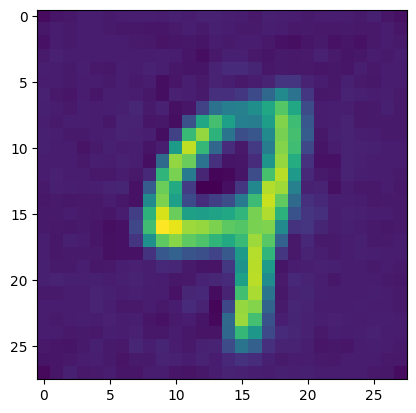

##########
Iteration: 0 | loss: 0.0006111182738095522


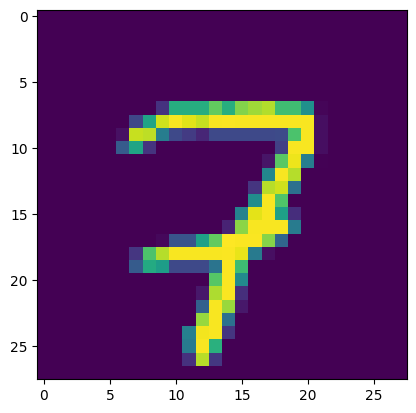

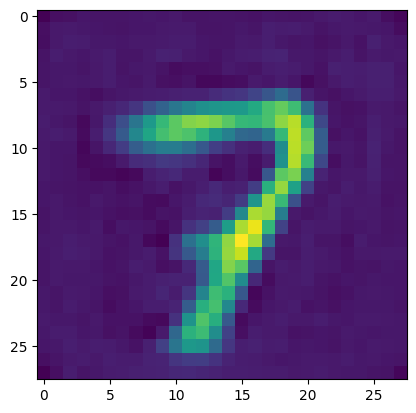

Iteration: 1 | loss: 0.0005433392361737788


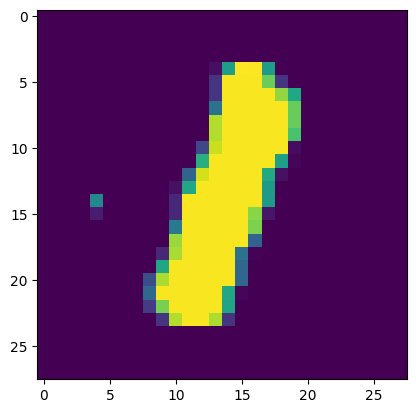

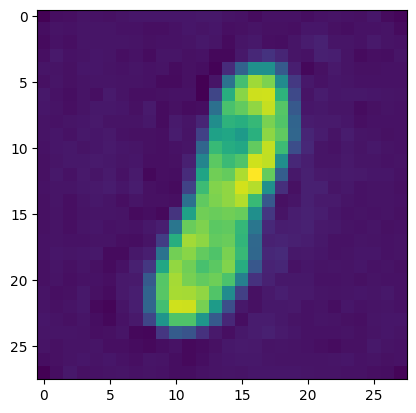

Iteration: 100 | loss: 0.00058635079767555


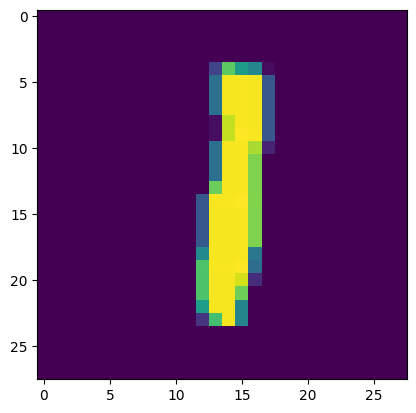

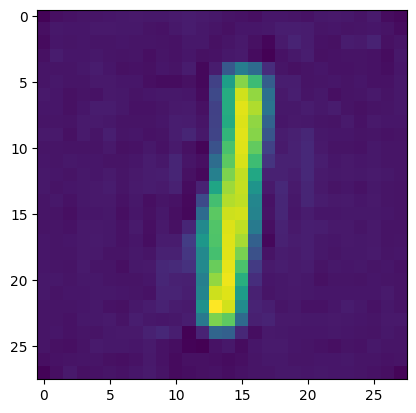

Iteration: 200 | loss: 0.000521178706549108


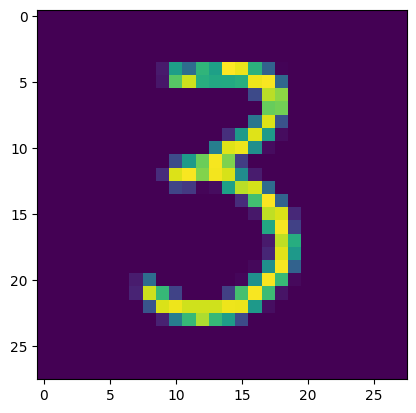

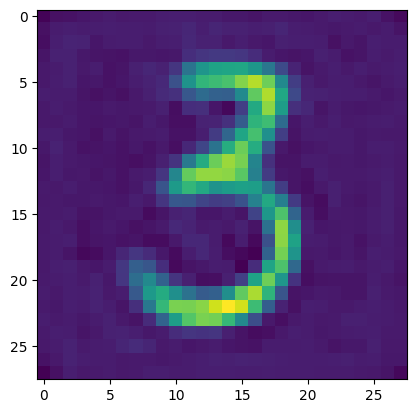

Iteration: 300 | loss: 0.0004948354326188564


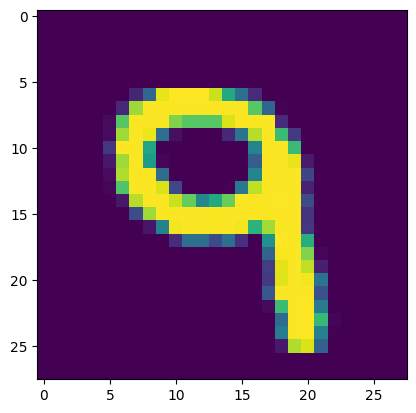

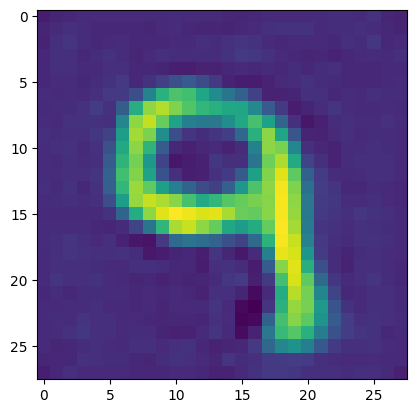

Iteration: 400 | loss: 0.0005811757291667163


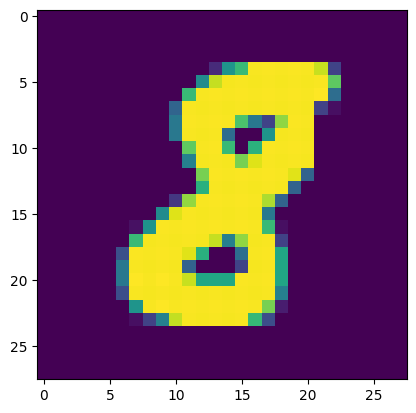

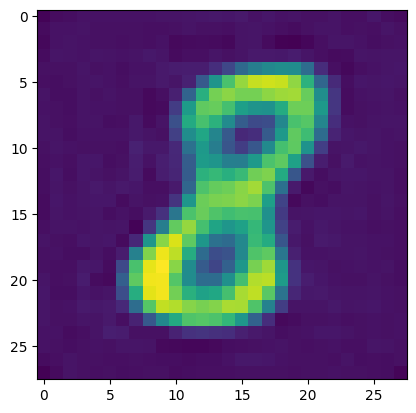

Iteration: 500 | loss: 0.0004893242730759084


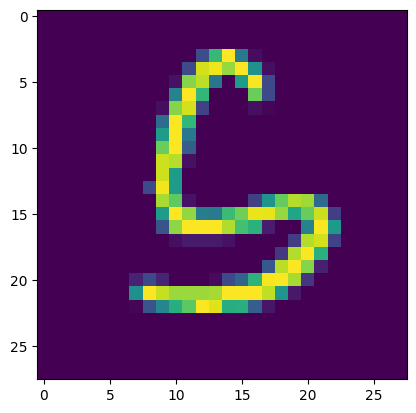

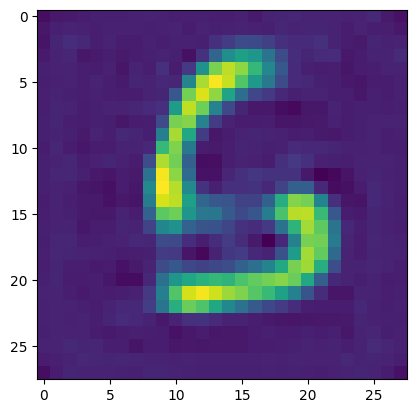

Iteration: 600 | loss: 0.0004527148848865181


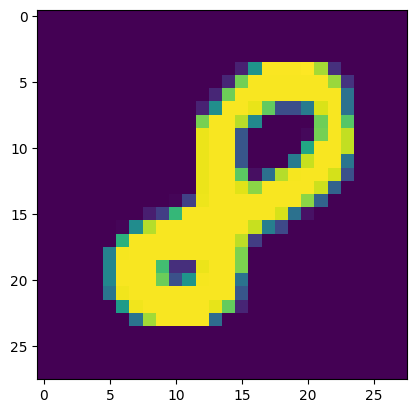

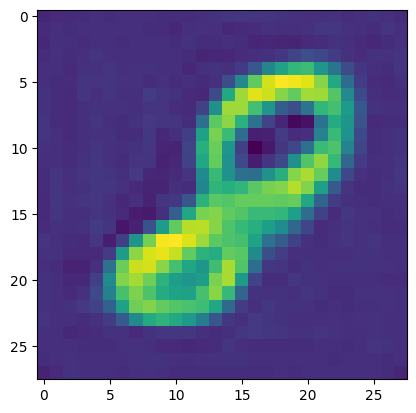

Iteration: 700 | loss: 0.0005002335528843105


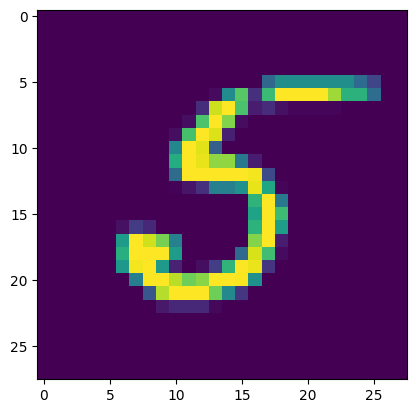

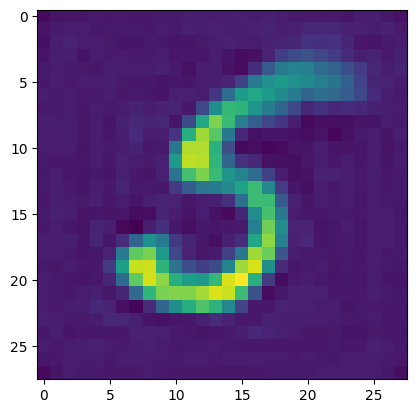

Iteration: 800 | loss: 0.00040741427801549435


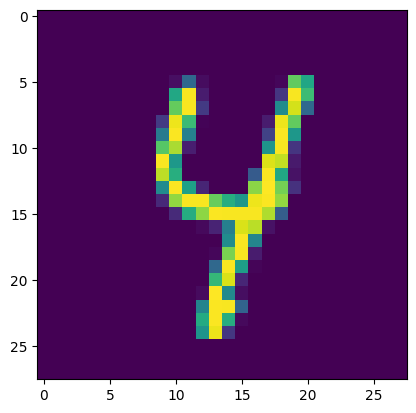

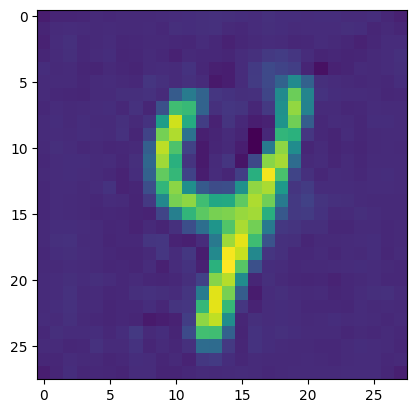

Iteration: 900 | loss: 0.00037376658292487264


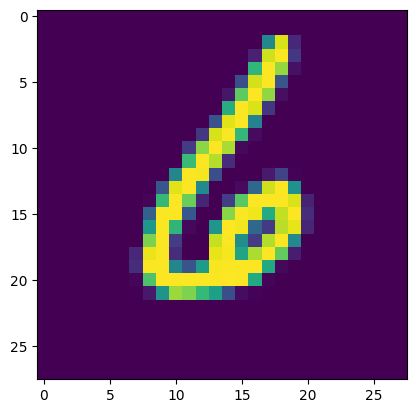

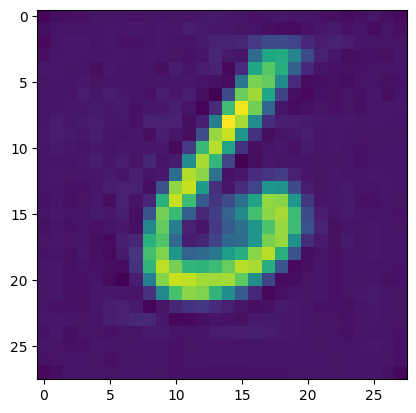

Iteration: 1000 | loss: 0.00039933164953254163


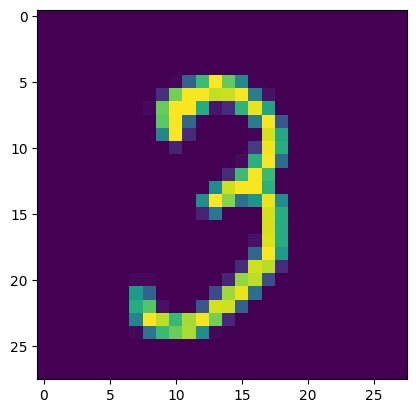

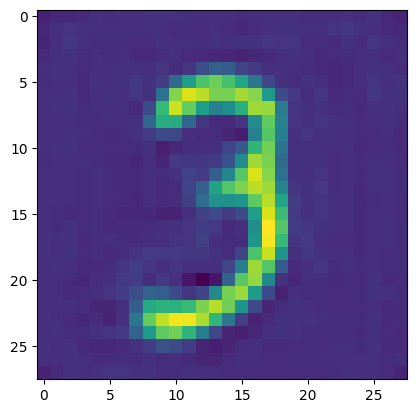

Iteration: 1100 | loss: 0.00036765533150173724


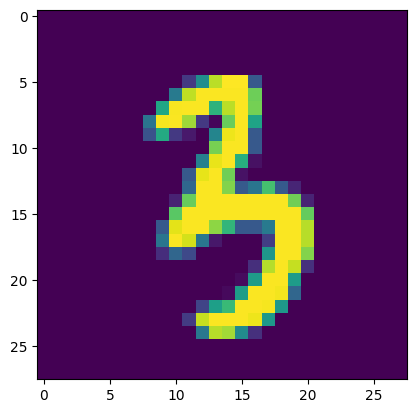

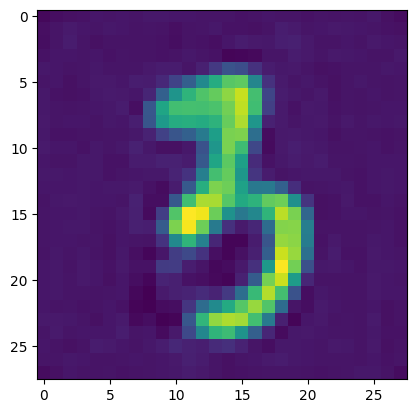

Iteration: 1200 | loss: 0.0003746338188648224


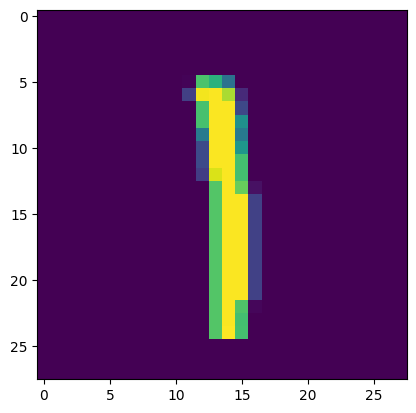

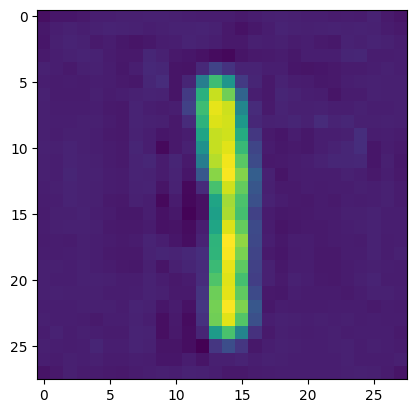

Iteration: 1300 | loss: 0.00041130694444291294


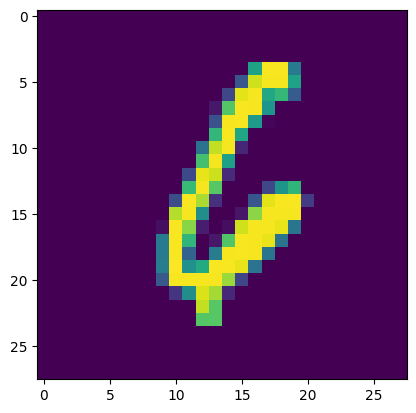

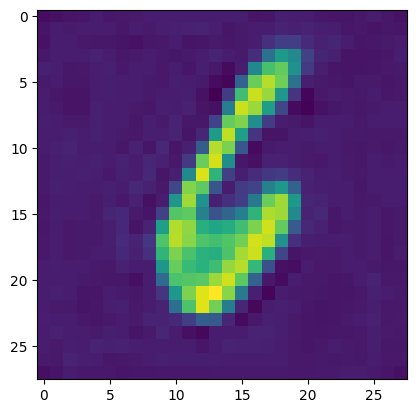

Iteration: 1400 | loss: 0.0003395909152459353


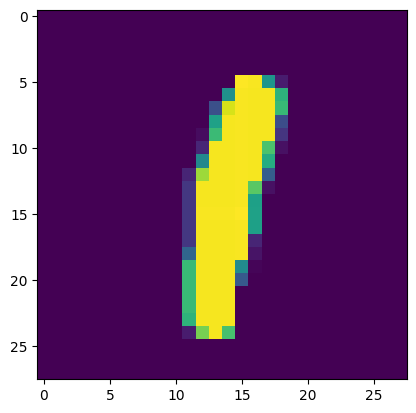

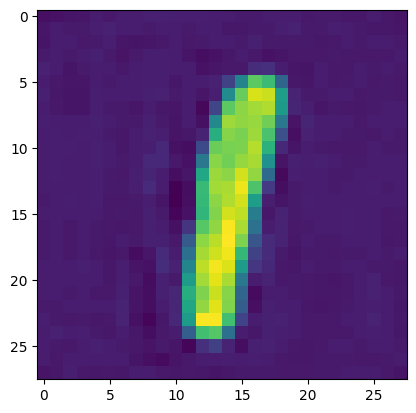

Iteration: 1500 | loss: 0.0003482878382783383


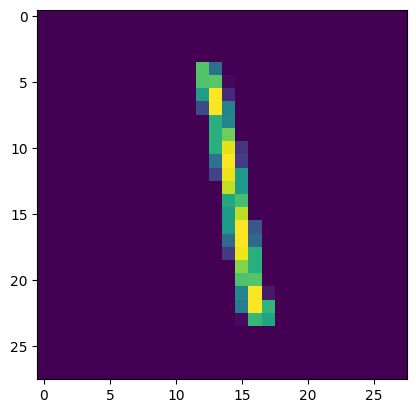

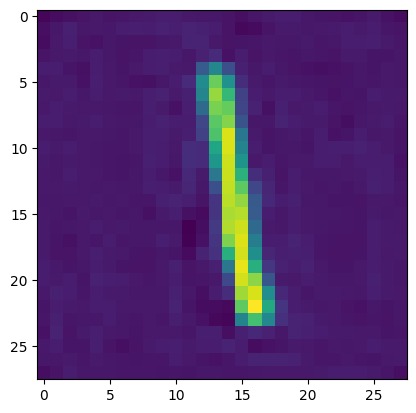

##########
Iteration: 0 | loss: 0.00036112143425270915


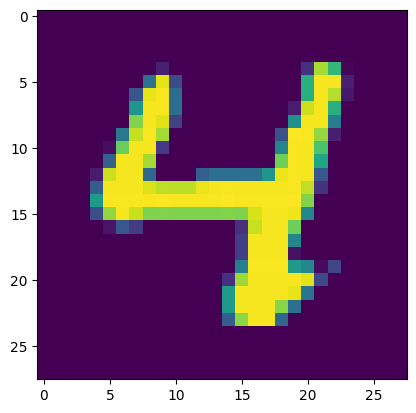

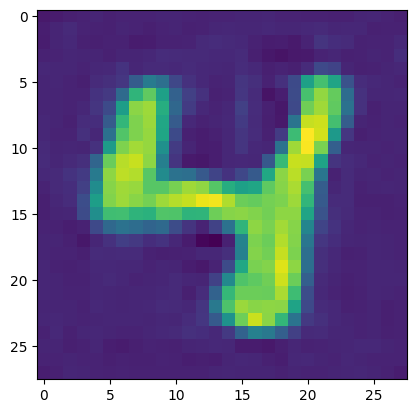

Iteration: 1 | loss: 0.0004074600001331419


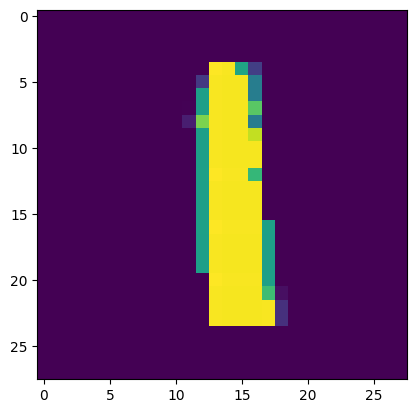

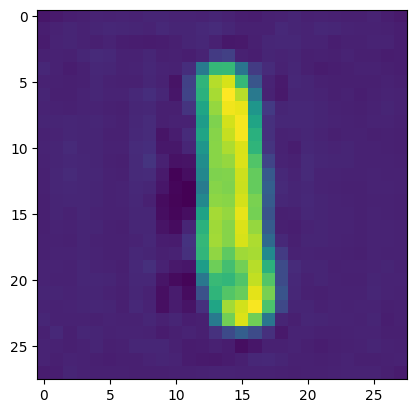

Iteration: 100 | loss: 0.0003891818050760776


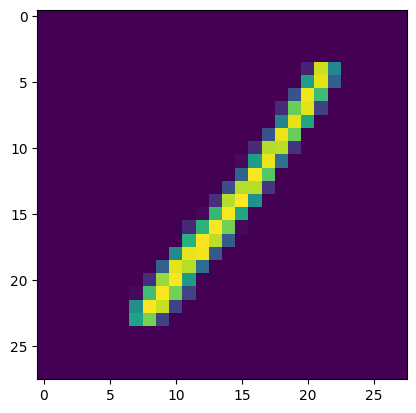

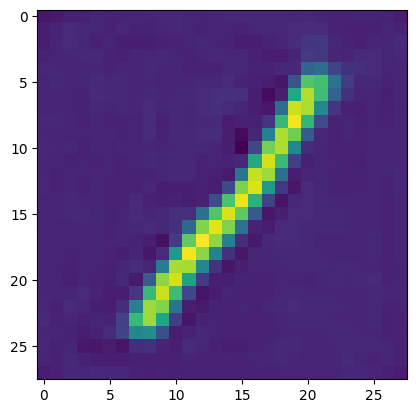

Iteration: 200 | loss: 0.00039551069494336843


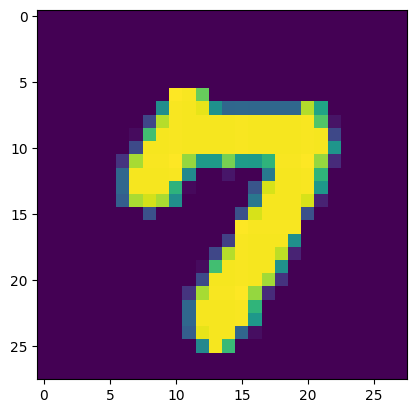

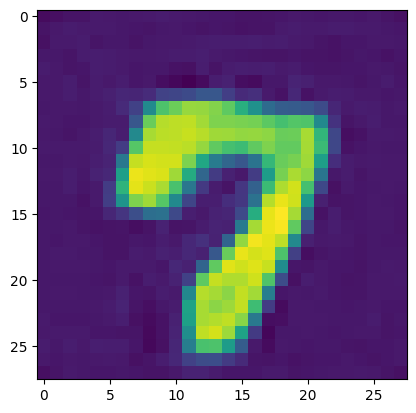

Iteration: 300 | loss: 0.00034730759216472507


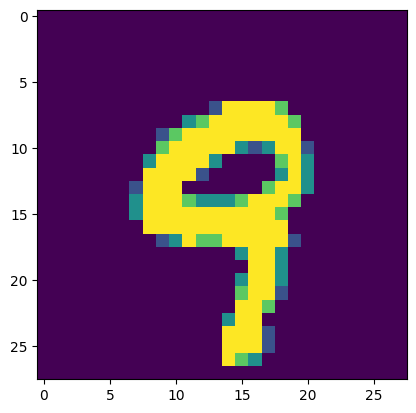

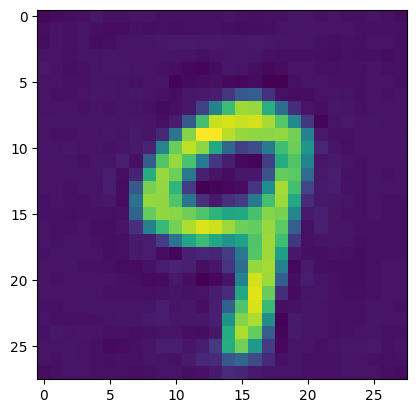

Iteration: 400 | loss: 0.0002944843436125666


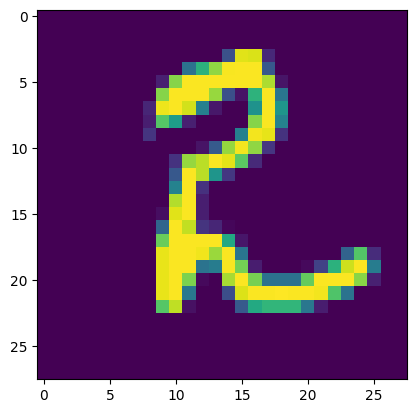

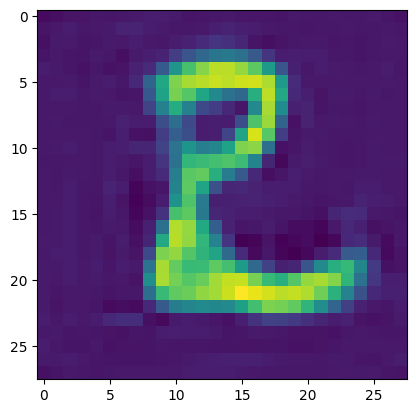

Iteration: 500 | loss: 0.0003246900741942227


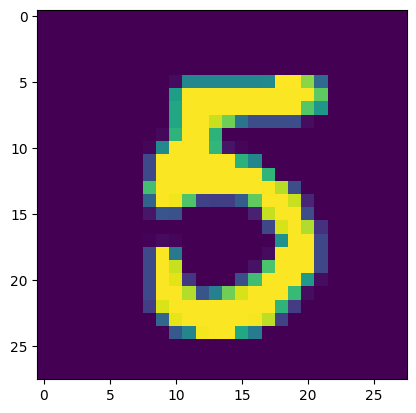

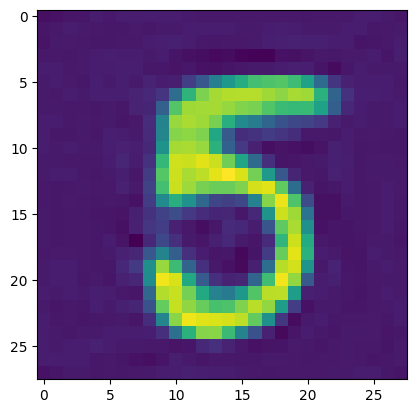

Iteration: 600 | loss: 0.00039836837095208466


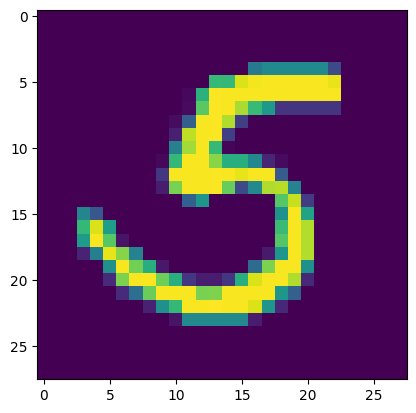

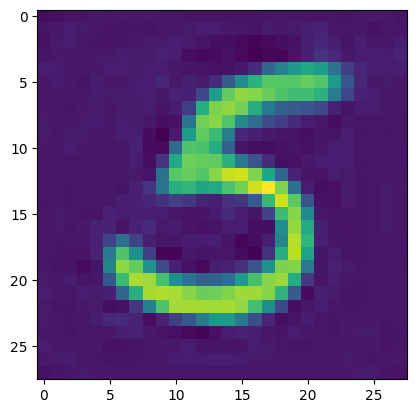

Iteration: 700 | loss: 0.0003114960854873061


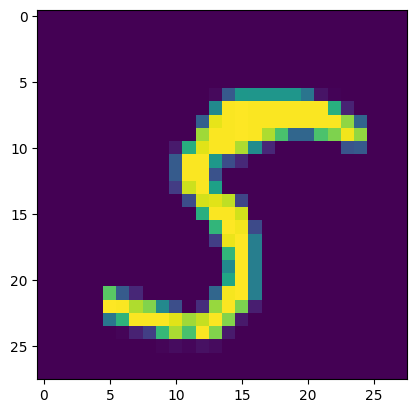

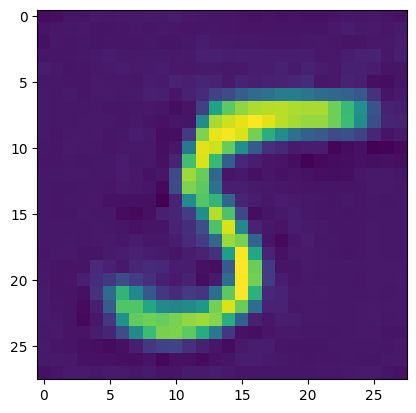

Iteration: 800 | loss: 0.00037792869261465967


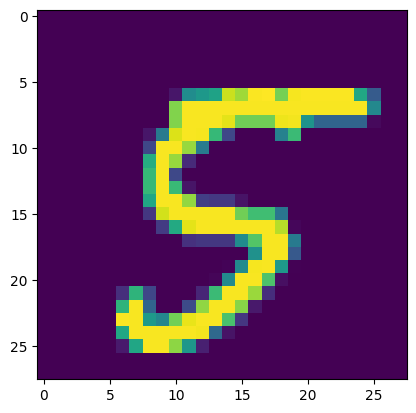

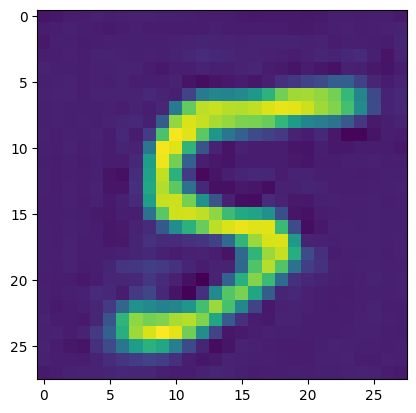

Iteration: 900 | loss: 0.0003954391577281058


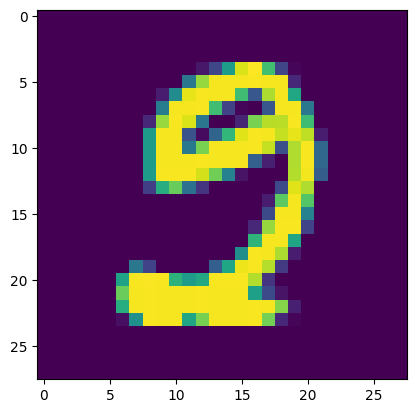

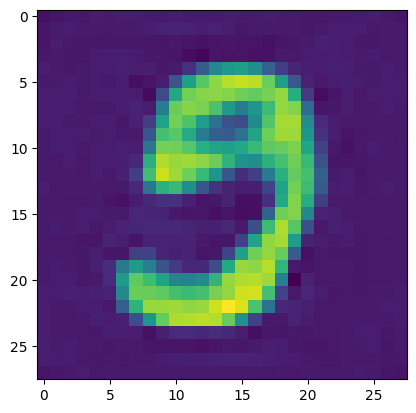

Iteration: 1000 | loss: 0.00037160940701141953


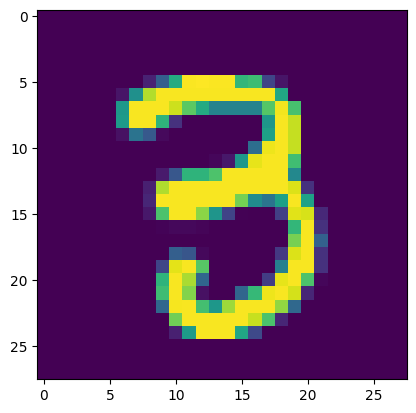

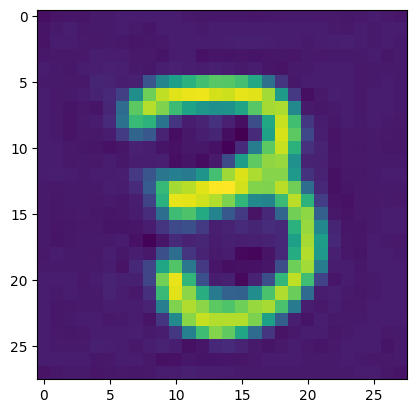

Iteration: 1100 | loss: 0.0003721914836205542


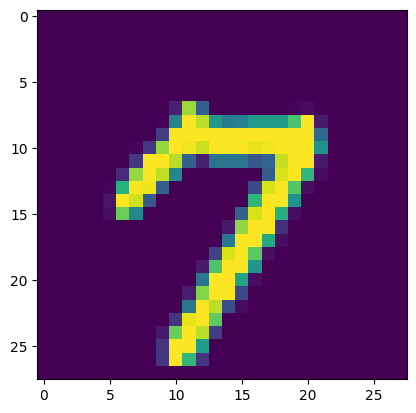

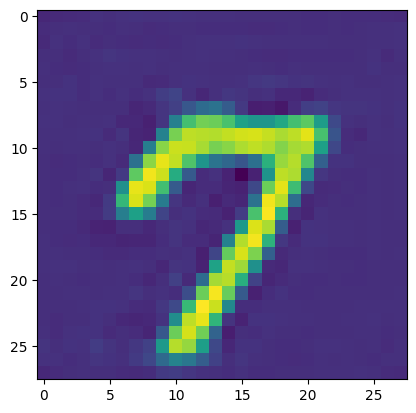

Iteration: 1200 | loss: 0.0003385074087418616


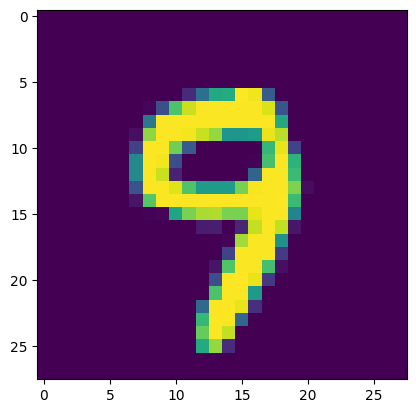

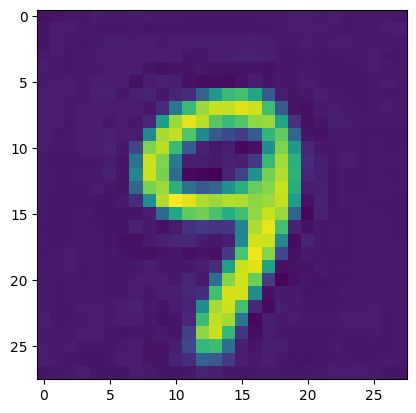

Iteration: 1300 | loss: 0.00029855273896828294


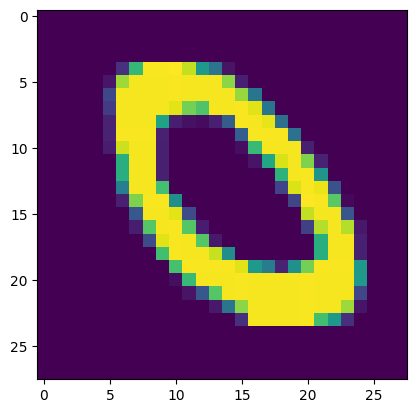

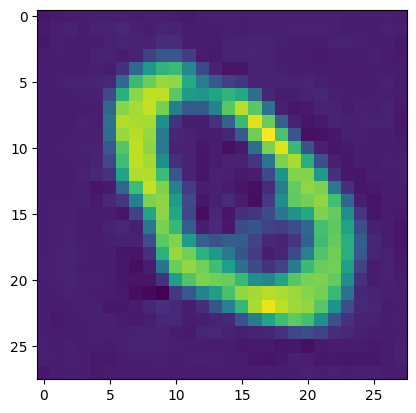

Iteration: 1400 | loss: 0.0002838097861967981


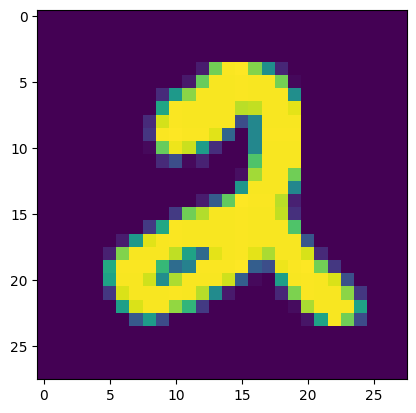

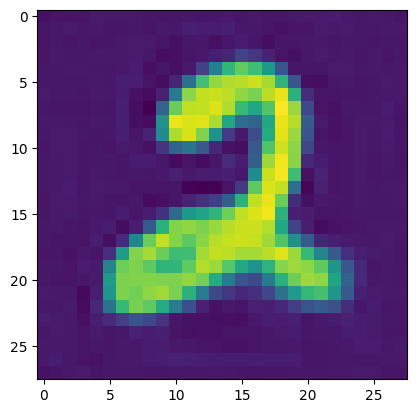

Iteration: 1500 | loss: 0.0003166280221194029


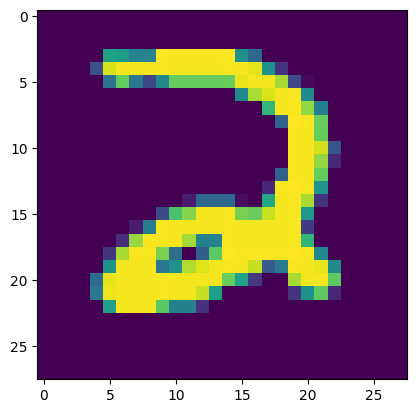

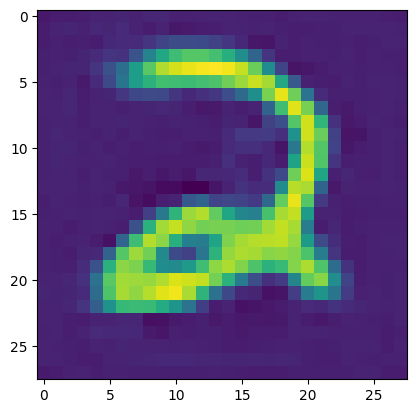

##########


In [543]:
for epoch in range(3):
    for i, (input, _) in enumerate(train_loader):
    
        opt.zero_grad()
    
        label_pred = model(input)
        
        loss = criterion(label_pred.flatten(2,-1), input)
        
        loss.backward()
        
        opt.step()
    
        if i==1 or i%100==0:
            print(f"Iteration: {i} | loss: {loss.item()/32}")
            res = label_pred[0].squeeze().detach().numpy()
            plt.imshow(input[0].detach().numpy().reshape(28, 28))
            plt.show()
            plt.imshow(res)
            plt.show()
            
    print("#"*10)

## Test Model After Training

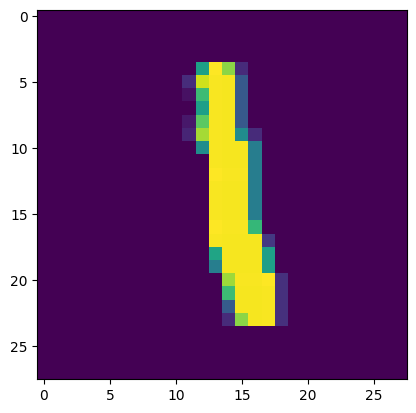

In [544]:
img = mnist[6][0]
imshow_image(img)

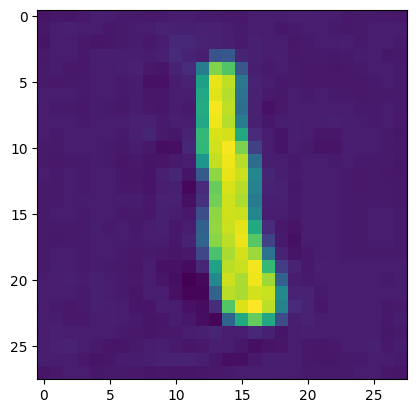

In [545]:
imshow_image(model(img))

## Save Models AutoEncoder, Encoder, Decoder

In [546]:
torch.save(model.state_dict(), "./models/AutoEncoder_CNN_V3.pth")

In [547]:
torch.save(model.encoder.state_dict(), "./models/Encoder_CNN_V3.pth")

In [548]:
torch.save(model.decoder.state_dict(), "./models/Decoder_CNN_V3.pth")

## Load Model

In [549]:
model = AutoEncoderCNN()

In [550]:
model.load_state_dict(torch.load("./models/AutoEncoder_CNN_V3.pth"))

<All keys matched successfully>

In [551]:
model

AutoEncoderCNN(
  (encoder): Encoder(
    (conv_encoder): Sequential(
      (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
      (1): Conv2d(10, 8, kernel_size=(3, 3), stride=(1, 1))
      (2): ReLU()
      (3): Conv2d(8, 4, kernel_size=(7, 7), stride=(1, 1))
      (4): Flatten(start_dim=1, end_dim=-1)
    )
    (linear_encoder): Sequential(
      (0): Linear(in_features=1296, out_features=128, bias=True)
      (1): Linear(in_features=128, out_features=32, bias=True)
      (2): ReLU()
      (3): Linear(in_features=32, out_features=100, bias=True)
    )
  )
  (decoder): Decoder(
    (linear_decoder): Sequential(
      (0): Linear(in_features=100, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=128, bias=True)
      (3): ReLU()
      (4): Linear(in_features=128, out_features=1296, bias=True)
      (5): Unflatten(dim=1, unflattened_size=(4, 18, 18))
    )
    (conv_decoder): Sequential(
      (0): ConvTranspose2d(4, 8, kernel_size=(7, 7)

## Generate New Instance of Images

In [552]:
def get_images_of(digit: int = 0, dataset=mnist) -> None:
    return Subset(mnist, [idx for idx, label in enumerate(dataset.targets) if label in [digit]])
    

In [553]:
mnist

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../files/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Flatten(start_dim=1, end_dim=-1)
           )

In [554]:
zeros = get_images_of(0)

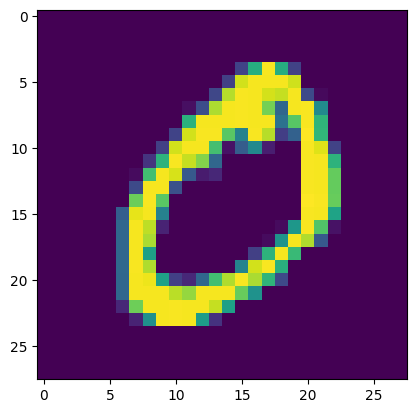

In [555]:
imshow_image(zeros[0][0])

In [556]:
zeros_loader = DataLoader(zeros, batch_size=100)

In [557]:
input = torch.stack([ tensor for i, (tensor, _) in enumerate(zeros_loader) if tensor.shape[0]!=23 and i<=2])

In [558]:
zeros_emb = model.encoder(input)

In [559]:
zeros_mean = zeros_emb.mean(axis=0)

In [560]:
zeros_mean.shape

torch.Size([100])

In [561]:
zeros_std = zeros_emb.std(axis=0)

In [562]:
zeros_std.shape

torch.Size([100])

In [583]:
zeros_emb[1].shape

torch.Size([100])

In [596]:
a = (zeros_emb[10] - zeros_mean[10])/zeros_std[5]

<Axes: ylabel='Count'>

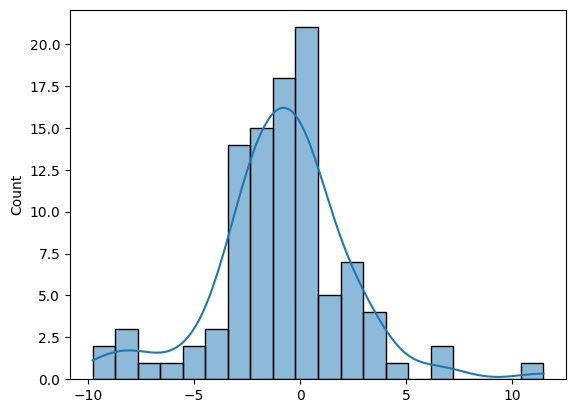

In [597]:
sns.histplot(a.detach().numpy(), bins=20, kde=True)

In [598]:
from sklearn.manifold import TSNE

In [599]:
tsne = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3)

In [600]:
zeros_dist = tsne.fit_transform(zeros_emb.detach().numpy())

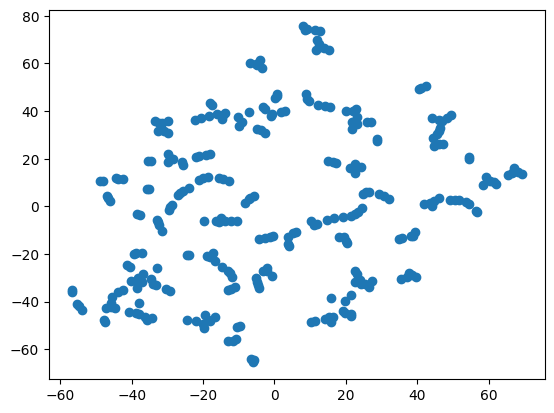

In [601]:
plt.scatter(zeros_dist[:, 0], zeros_dist[:, 1])

In [645]:
z_new = torch.normal(zeros_mean, zeros_std).view(1, -1)

In [646]:
z_new

tensor([[-0.4444, -0.4843, -0.1217,  0.4293, -4.1242,  0.1653, -0.9214, -0.4893,
         -0.0076, -0.6837,  1.4568, -4.2605, -0.4410, -1.6353,  1.6865, -1.3718,
         -1.7945, -0.5416,  1.1536, -1.7961, -2.2547,  0.0370, -0.8644,  2.8425,
          0.5814,  2.1262, -0.0784, -0.7063,  0.0686,  0.1297,  0.2318,  1.4045,
         -0.6122,  0.7514, -0.1790, -0.6330, -0.9379, -0.8052,  1.5036,  1.0929,
         -0.6671,  1.0318,  0.8917, -0.8129,  0.1872,  1.4143, -0.6960, -0.4273,
          1.4674, -1.7910, -1.5916, -0.1555,  2.1687, -3.0254, -1.4209,  0.9788,
          0.2709,  0.3999,  0.6715, -0.2928, -0.0541, -1.1357,  0.5599,  0.3019,
          0.1113,  1.6281, -1.3448,  0.2839, -1.7906, -2.9988, -0.3619, -0.6024,
          0.8620,  2.3657,  0.1752, -2.9499, -0.3196,  1.0706,  0.0961,  0.7851,
         -0.0398,  0.0275, -2.4018, -0.5858, -1.4907,  2.3992,  0.7708, -1.6419,
         -0.1258,  3.7262, -0.4675, -0.5594, -0.5640, -1.1896, -0.1754,  0.3540,
          1.1100, -0.6278, -

In [647]:
gen_img = model.decoder(z_new)

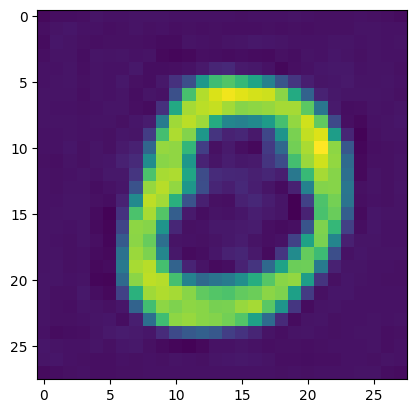

In [648]:
imshow_image(gen_img)